Multilevel modeling
====

<blockquote>
Classical estimation just using the local information can be essentially useless if the sample size is small in the group. At the other extreme, a classical regression ignoring group indicators can be misleading in ignoring group-level variation. Multilevel modeling allows the estimation of group averages and group-level effects, compromising between the overly noisy within-group estimate and the oversimplified regression estimate that ignores group indicators.
<br><br>
- Gelman and Hill, p.6
</blockquote>

Basic probability and statistics
====

The ***standard error*** is the standard deviation of the parameter estimate and gives us a sense of our uncertainty about a parameter.

When estimating the mean of an infinite population, given a simple random sample of size $n$, the standard error is $\sqrt{\sigma/n}$, where σ is the standard deviation of the measurements in the population.

### Dispersion

The ratio of variance/mean is thus a measure of dispersion, with var/mean = 1 indicating that the Poisson model is appropriate, and var/mean > 1 indicating overdispersion (and var/mean < 1 indicating underdispersion, but in practice this is much less common).

### Hypothesis tests: multiple comparison procedures

A concern is sometimes expressed that if you test a large number of hypotheses, then you’re bound to reject some. For example, with 100 different hypothesis tests, you would expect about 5 to be statistically significant at the 5% level—even if all the hypotheses were true. This concern is sometimes allayed by multiple comparisons procedures, which adjust significance levels to account for the multiplicity of tests.

Linear regression
====

<blockquote>
Regression coefficients are more complicated to interpret with multiple predictors because the interpretation for any given coefficient is, in part, contingent on the other variables in the model. Typical advice is to interpret each coefficient “with all the other predictors held constant.”
<br><br>
- Gelman and Hill, p.32
</blockquote>

It is useful to realize that $\hat{\beta}$ is a linear function of the outcomes $y$:

$$\hat{\beta} = \left(X^tX\right)^{-1}X^ty$$

The ***proportion of explained variance***:

$$ R^2 = 1 - \hat{\sigma}^2/s_y^2 $$

where $\hat{\sigma}$ is the residual variance and $s_y^2$ is the variance in the data.

Interpreting the proportion of explained variance can be tricky because its numerator and denominator can be changed in different ways.

Assumptions
----

* Validity:
    - The outcome measure accurately reflects the phenomenon of interest.
    - The model includes all relevant predictors.
    - The model generalized to cases to which is will be applied.
* Additivity and linearity:
    - Can be imposed via transformations, e.g. $\log(xyz)$.
* Independence of errors
* Equal variance of errors
* Normality of errors

A good way to diagnose violations of some of the assumptions just considered (importantly, linearity) is to plot the residuals $r_i$ versus fitted values $X_i\hat{\beta}$ or simply individual predictors $x_i$.

In [38]:
%matplotlib inline
%config Completer.use_jedi = False

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('dark_background')

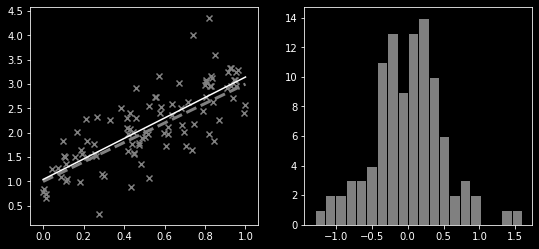

In [90]:
N = 100
D = 1
epsilon = 0.5
X = np.ones((D+1, N))
X[:-1,:] = np.random.rand(D, N)
beta = np.array([2, 1])
y = X.T.dot(beta) + epsilon * np.random.randn(N)

reg = LinearRegression().fit(X.T, y)
beta_hat = reg.coef_
beta_hat[-1] = reg.intercept_
beta_hat = np.array(beta_hat)

residuals = y - X.T.dot(beta_hat)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plt.sca(axs[0])
plt.scatter(X[:-1,:], y, color='gray', marker='x');
plt.plot([0, 1], [1, 3], linestyle='--', color='gray', linewidth=3)
plt.plot([beta_hat[-1], np.ones((1, 2)).dot(beta_hat)], linestyle='-', color='w')
plt.sca(axs[1])
plt.hist(residuals, bins=20, color='gray', edgecolor='k');